In [2]:
import serial
import serial.tools.list_ports
import time

In [3]:
com_ports=serial.tools.list_ports.comports()
for p in com_ports:
    print(p.device)

/dev/ttyUSB0


In [4]:
arduino = serial.Serial('/dev/ttyUSB0', baudrate=115200, timeout=1)

In [5]:
def handshake_arduino(arduino, sleep_time=1):
    time.sleep(sleep_time);
    timeout = arduino.timeout
    arduino.timeout = 2
    arduino.write('h'.encode())
    while (arduino.in_waiting < 0):
        pass
    response= arduino.read_until()
    print(response.decode().strip())
    arduino.timeout = timeout




handshake_arduino(arduino)

R


In [25]:
def enable_fast_mode(mode):
    arduino.write('x'.encode())
def disable_fast_mode(mode):
    arduino.write('z'.encode())
                     

In [26]:
def parse_raw_line(raw_line):
    raw_line = raw_line.decode()
    if raw_line[-1] != "\n":
        raise ValueError(
            "Il messaggio inviato da Arduino deve terminare con il carattere nuova linea."
        )

    time,temp= raw_line.rstrip().split(",");

    return float(time)/1000.,float(temp)

In [32]:
def daq_get_values(times,positions,time_base=0):
    # invio il codice per la lettura di una temperatura
    #t lettura normale
    #f lettura rapida
    arduino.write('f'.encode())
    
    while arduino.in_waiting < 0:
        pass

    # Leggo i dati inviati tramite seriale a seguito della richiesta di lettura
    raw = arduino.read_until()
      
    # Elaboro i dati forniti, traslando il tempo iniziale 
    try:
        time,position=parse_raw_line(raw)
        times.append(time-time_base)
        positions.append(position)
        
    except:
        pass

In [34]:
times1 = []
positions1= []

enable_fast_mode('mode')

daq_get_values(times1,positions1)
print(times1)
print(positions1)

[228.483]
[1281.0]


In [10]:
import matplotlib.pyplot as plt 

%matplotlib widget
plt.rcParams['animation.html']='jshtml'

In [11]:
def new_figure():
    fig=plt.figure(figsize=[10,10])
    plt.grid()
    plt.xlabel('Tempo (s)')
    plt.ylabel('Temperatura (°C)')
    #plt.rcParams['figure.dpi'] = 150
    return fig

In [15]:
#La funzione getData raccoglie dati ogni delta_t secondi per un tempo totale pari a run_time
#Ricorda di passare alla funzione la figura in cui vuoi che vengano disegnati i dati

def getData(run_time,delta_t,current_figure):
        
        current_times=[]
        current_positions=[]
        
        arduino.write('n'.encode())
        time.sleep(1);
        arduino.write('r'.encode())
        time.sleep(1);
        #pulisco il buffer seriale
        arduino.read_all()
        daq_get_values(current_times,current_positions)
        run=True
             
        while run:
            
            daq_get_values(current_times,current_positions)
            plt.plot(current_times,current_positions,'-o',color='gray',markerfacecolor='red')
            current_figure.canvas.draw()
            time.sleep(delta_t)
            if current_times[-1]-current_times[0]>run_time:
                run=False
        return current_times,current_positions


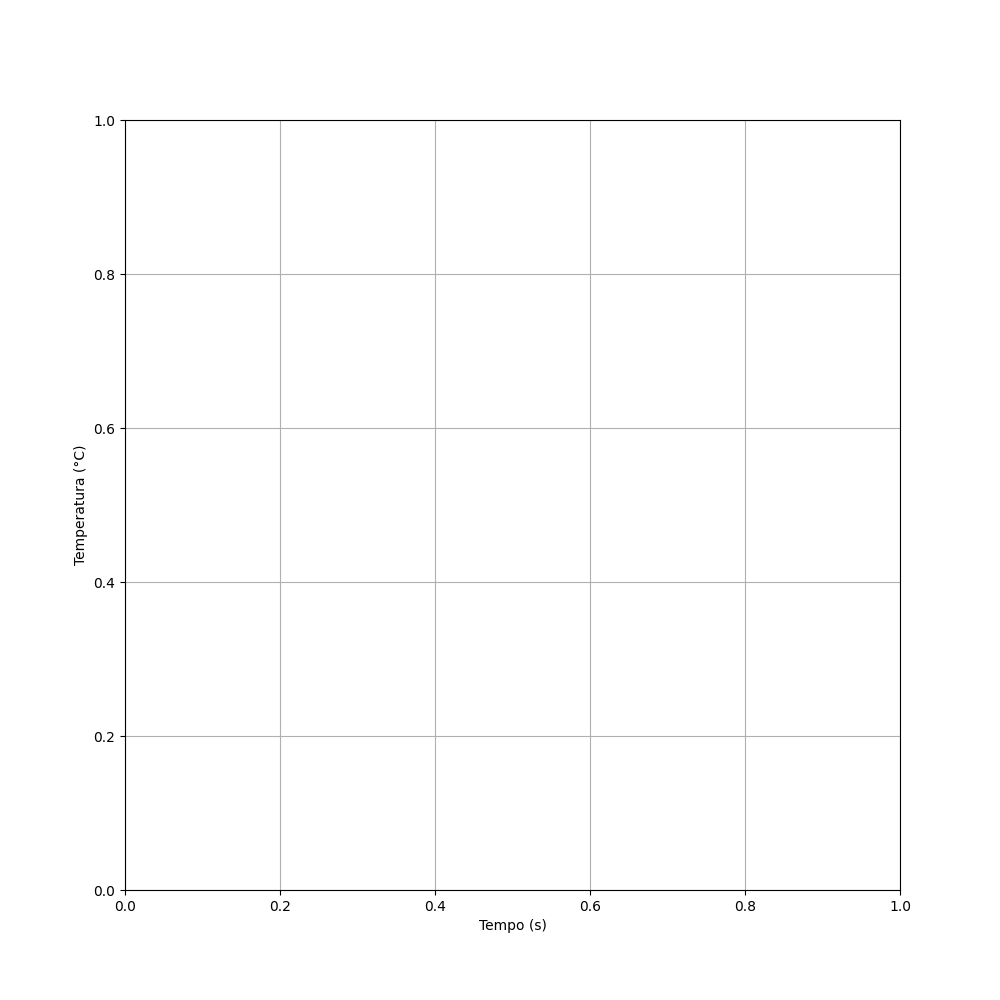

In [38]:
figura_passo_0=new_figure()

In [39]:
tempi_passo_0,temperature_passo_0=getData(15,0.05 ,figura_passo_0)

## 